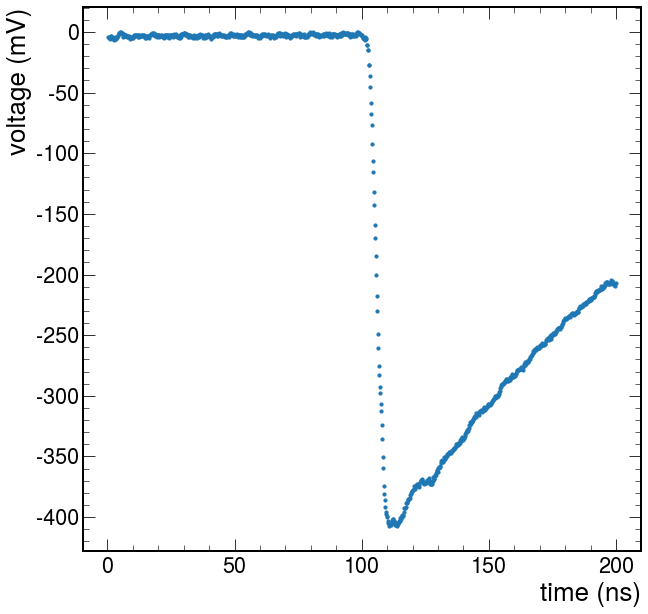

In [5]:
import matplotlib.pyplot as plt
import pylab
import numpy as np


with open("../data/Jun22Points/1.txt") as f:
    events = f.read().split('-- Event')


lines = events[31].split('\n')
time = []
voltage = []
#6 - 1028
for line in lines[6:1028]:
        
    values = line.split()
    if float(values[4]) < 10:
        time.append(float(values[2]))
        voltage.append(float(values[3]))
    
plt.scatter(time,voltage,s=10)
plt.xlabel('time (ns)')
plt.ylabel('voltage (mV)')
plt.show()

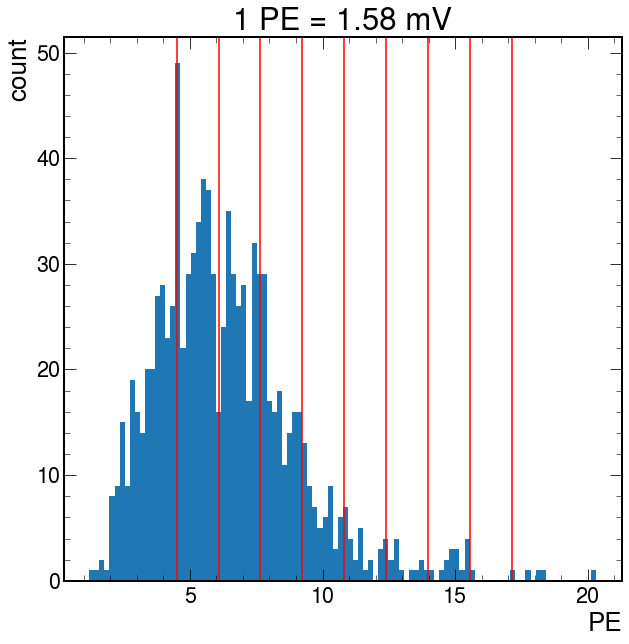

In [16]:
import matplotlib.pyplot as plt
import pylab
import numpy as np
from matplotlib import colors
import mplhep as hep
hep.style.use(hep.style.CMS)
#hep.set_style("CMS")


with open("Jun22Scan.txt") as f:
          points = f.read().split('Point')
#264
point = points[113]
#print(point)
peaktopeak = []
p2ps = point.split('\n')
for p2p in p2ps:
    try:
        if float(p2p) > 0 and float(p2p) < 495:
            peaktopeak.append(float(p2p)/1.58)
    except ValueError:
        x=1
plt.hist(peaktopeak,100,range=(min(peaktopeak),max(peaktopeak)))


for i in range(9):
    plt.axvline((i*1.58)+4.5,color='red')
plt.title('1 PE = 1.58 mV')
plt.xlabel('PE')
plt.ylabel('count')
plt.show()

[1.06628387 0.09182098 0.09598682]
[32.08792849  5.73669153 -2.38495798]


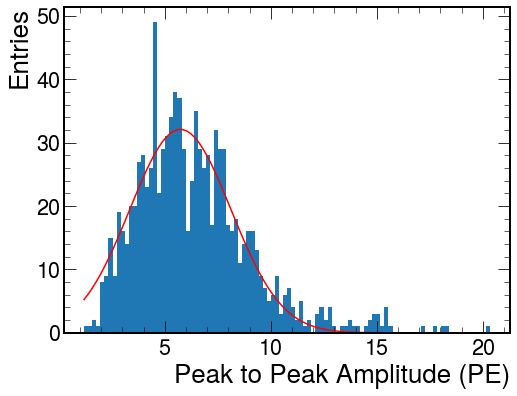

In [17]:
from scipy.optimize import curve_fit
def gaussian(x, amp, mean, sigma):
    return amp * np.exp( -(x - mean)**2 / (2*sigma**2) ) 
fig = plt.figure( figsize=(8, 6), facecolor='w')
hist_data, bins, patches = plt.hist(peaktopeak, 100, range=[min(peaktopeak), max(peaktopeak)])
x = np.linspace(min(peaktopeak), max(peaktopeak), 100)
y = hist_data
popt, pcov = curve_fit(gaussian, x, y, p0=(60, sum(peaktopeak)/len(peaktopeak), 50))
y = gaussian(x, *popt)
plt.plot(x, y, color='r')
plt.xlabel('Peak to Peak Amplitude (PE)')
plt.ylabel('Entries')
perr = np.sqrt(np.diag(pcov))
print(perr)
print(popt)
#plt.errorbar(x,y,yerr=np.sqrt(y))